In [1]:
# Importing packages 
## Recognise numpy and matplotlib, not scipy ( So I read up on it )

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [30]:
# defining a polynomial function 

def poly(x,A,B,C):
    return A*x**2 + B*x + C

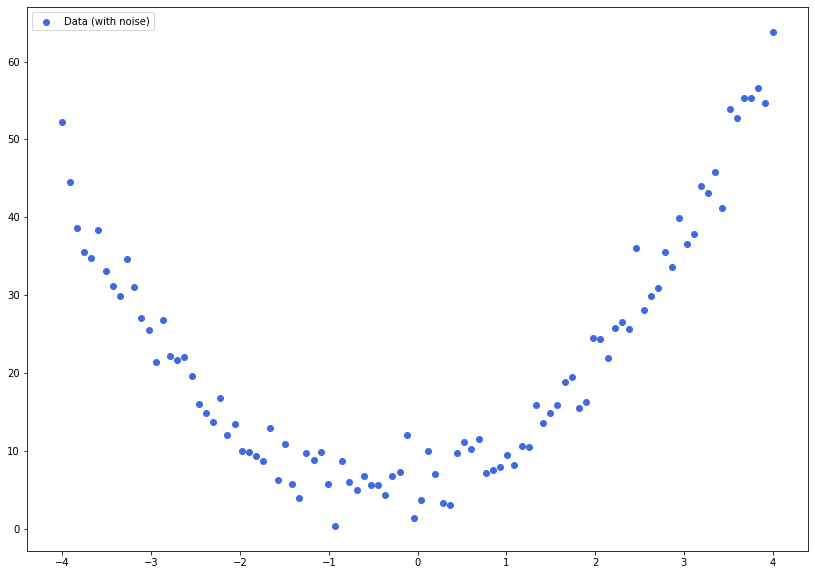

In [18]:
# I make the range larger to see both sides of the origin which I thought would be more interesting for a polynomial fit

#linspace fills between the minimum and maximum with n number of points.
x = np.linspace(-4, 4, 100)

# We use all the points from the linspace and plot them on the polynomial of 3x^2 + 2x + 5

y = poly(x, 3.0, 2.0, 5.0)

# Create an array of length x with numbers in the range 0 to 1. This is our noise term.
## An array of the same length of x (100), to add each point its own random noise 
## I increase the noise variable to see it better 
noise = np.random.normal(0, 3, len(x))

# Add noise to our "pure" signal
data = y + noise

# Plotting
fig = plt.figure(figsize=(14.0,10.0))
plt.scatter(x, data, label='Data (with noise)', color = "royalblue")
plt.legend(loc="upper left")

In [22]:
# Now using scipy to find the best way to plot this

# We use the scipy optimize package to perform our curve fit
popt, pcov = curve_fit(poly, x, data)

# popt - The best fit parameters
# pcov - The covariance matrix

print(popt)
print(" ")
print(pcov)

[2.9613071  2.11562486 5.3277641 ]
 
[[ 3.22213426e-03 -3.84614650e-12 -1.75318818e-02]
 [-3.84614650e-12  1.40212976e-02  4.30934294e-11]
 [-1.75318818e-02  4.30934294e-11  1.71683291e-01]]


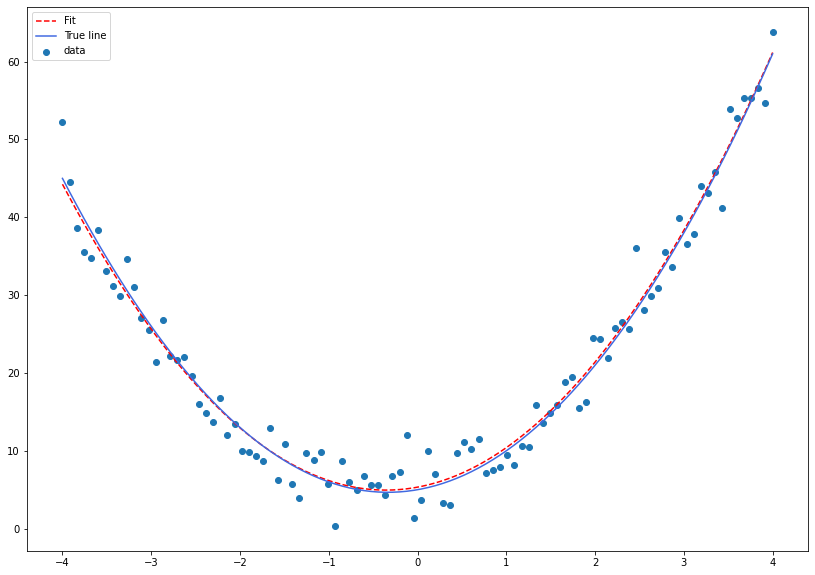

In [29]:
fig = plt.figure(figsize=(14.0,10.0))
plt.scatter(x, data, label='data')
plt.plot(x, poly(x, *popt), 'r--', label="Fit")
plt.plot(x, y, 'royalblue', label="True line")
plt.legend(loc="upper left")